<a href="https://colab.research.google.com/github/KseniiaL/WHO-Covid-19-db-exploratory-analysis/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import needed tools

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight") 
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving WHO-COVID-19-global-data.csv to WHO-COVID-19-global-data.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WHO-COVID-19-global-data.csv']))
# Dataset is now stored in a Pandas Dataframe
df = df.drop_duplicates()

Customise and explore dataset

In [0]:
df['day'] = pd.to_datetime(df['day']).dt.date
df['month'] = pd.DatetimeIndex(df['day']).month
df

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed,month
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1,2
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1,2
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1,2
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1,2
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
11380,2020-04-23,ZW,Zimbabwe,AFRO,1,4,0,28,4
11381,2020-04-24,ZW,Zimbabwe,AFRO,0,4,0,28,4
11382,2020-04-25,ZW,Zimbabwe,AFRO,0,4,1,29,4
11383,2020-04-26,ZW,Zimbabwe,AFRO,0,4,2,31,4


Make analysis

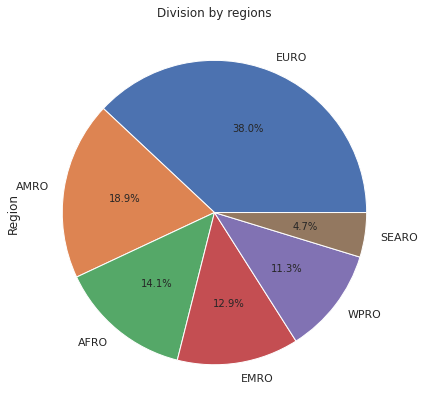

In [0]:
ax = (df[df.Confirmed > 0].Region.value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', figsize=(10,7), title="Division by regions")

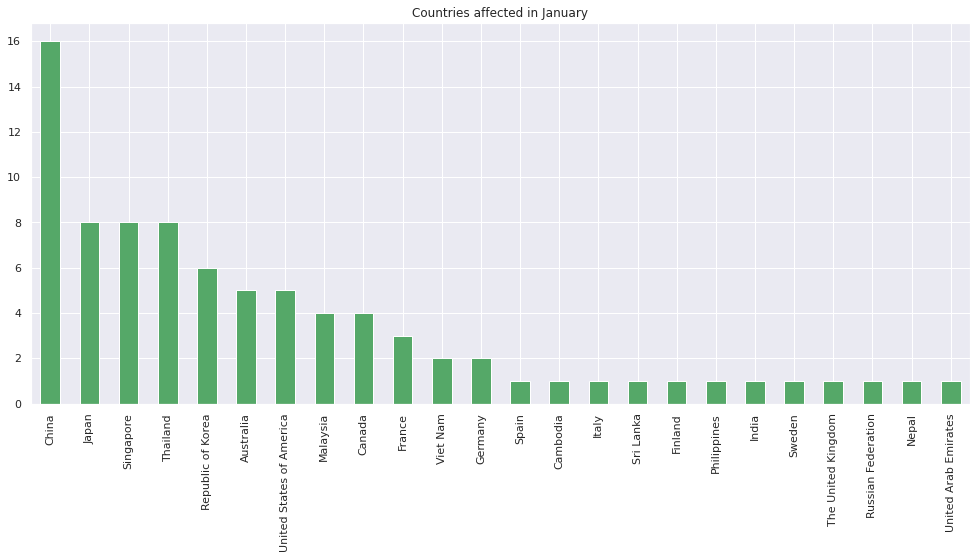

In [0]:
ax = df[(df.month == 1) & (df.Confirmed > 0)]['Country Name'].value_counts().plot(kind="bar", color="g", figsize=(15,7), title="Countries affected in January")

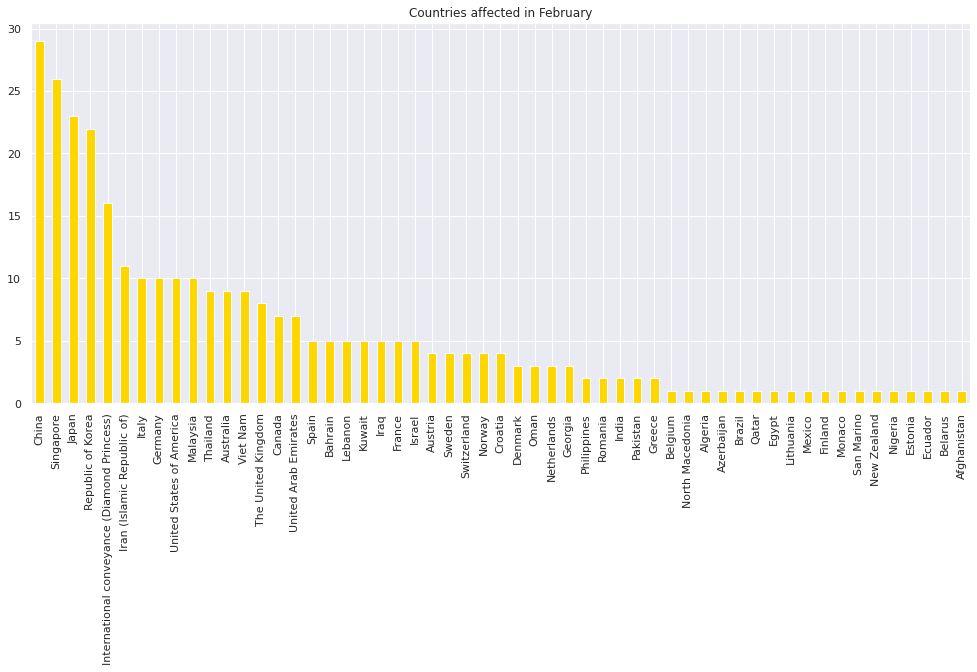

In [0]:
ax = df[(df.month == 2) & (df.Confirmed > 0)]['Country Name'].value_counts().plot(kind="bar", color="gold", figsize=(15,7), title="Countries affected in February")

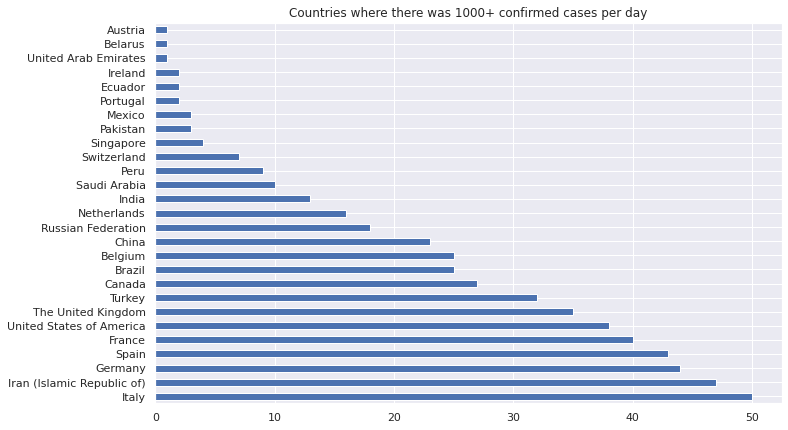

In [0]:
data = df[df.Confirmed > 1000]['Country Name'].value_counts()
ax = data.plot(kind="barh", figsize=(10,7), title="Countries where there was 1000+ confirmed cases per day")
# [ax.text(v, i, ' {:}'.format(v)) for i, v in enumerate(data)];

,Country Name,Cumulative Confirmed,Cumulative Deaths
11013,United States of America,931698,47980
9844,Spain,207634,23190
5390,Italy,197675,26644
3977,Germany,155193,5750
10411,The United Kingdom,152844,20732
3639,France,123279,22821
10653,Turkey,110130,2805
5072,Iran (Islamic Republic of),91472,5806
8771,Russian Federation,87147,794
2230,China,84341,4643


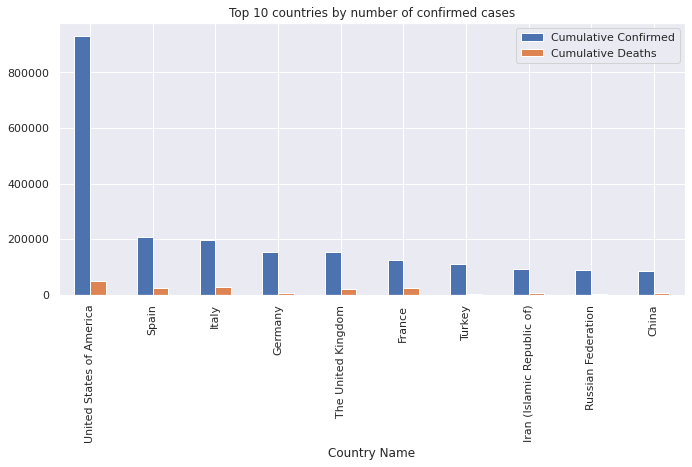

In [0]:
latest = '2020-04-27'
cum_data = df[(df.day == pd.to_datetime(latest))][['Country Name', 'Cumulative Confirmed', 'Cumulative Deaths']].sort_values('Cumulative Confirmed', ascending=False).head(10)
ax = cum_data.plot(kind='bar',x='Country Name',y=['Cumulative Confirmed', 'Cumulative Deaths'], figsize=(10,5), title="Top 10 countries by number of confirmed cases");
cum_data

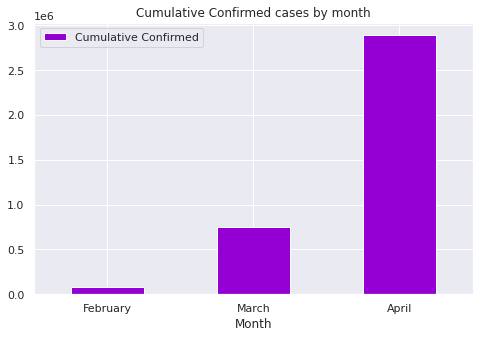

In [0]:
feb = df[(df.day == pd.to_datetime('2020-02-29'))]['Cumulative Confirmed'].sum()
mar = df[(df.day == pd.to_datetime('2020-03-31'))]['Cumulative Confirmed'].sum()
apr = df[(df.day == pd.to_datetime(latest))]['Cumulative Confirmed'].sum()
month_data = pd.DataFrame({
    'Month':['February','March','April'],
    'Cumulative Confirmed':[feb, mar, apr]})

ax = month_data.plot(kind='bar', x='Month', y='Cumulative Confirmed', title='Cumulative Confirmed cases by month', color="darkviolet", figsize=(7,5))
plt.xticks(rotation=0);

Analysis by regions

In [0]:
df.Region.value_counts()

EURO     3604
AMRO     2513
AFRO     1966
WPRO     1304
EMRO     1240
SEARO     675
Name: Region, dtype: int64

In [0]:
euro = df[(df.Region == "EURO") & (df.Confirmed > 0)]
amro = df[(df.Region == "AMRO") & (df.Confirmed > 0)]
afro = df[(df.Region == "AFRO") & (df.Confirmed > 0)]
wpro = df[(df.Region == "WPRO") & (df.Confirmed > 0)]
emro = df[(df.Region == "EMRO") & (df.Confirmed > 0)]
searo = df[(df.Region == "SEARO") & (df.Confirmed > 0)]

# fig, ax = plt.subplots()
# plots = [(euro, 'r', 'Europe'),
#          (amro, 'g', 'Americas'),
#          (afro, 'b', 'Africa'),
#          (wpro, 'magenta', 'Western Pacific'),
#          (emro, 'black', 'Eastern Mediterranean'),
#          (searo, 'gold', 'South-East Asia')]

# for dfr, color, label in plots:
#   dfr.plot.scatter(ax=ax, x='day', y='Confirmed', alpha=.5, color=color, label=label, figsize=(10,7), title="Daily increase in regions")
#   plt.xticks(rotation=45);

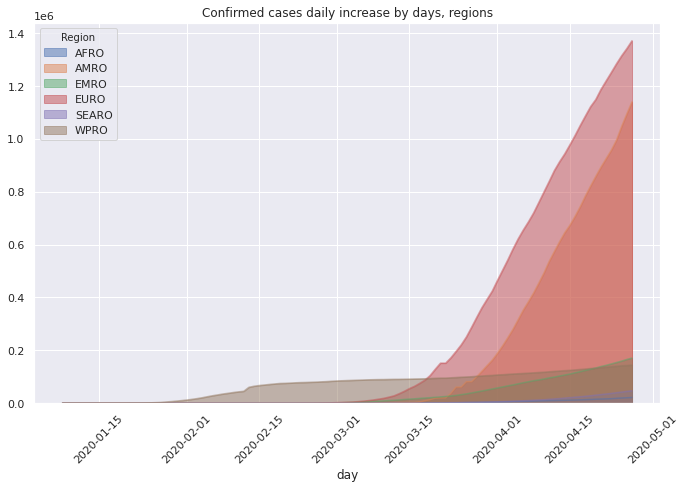

In [0]:
rdf = df[df.Confirmed > 0].groupby(['day', 'Region']).Confirmed.sum()
rdf = rdf.unstack().fillna(0)

ax = rdf.cumsum().plot.area(stacked=False, figsize=(10, 7), title="Confirmed cases daily increase by days, regions")
plt.xticks(rotation=45);

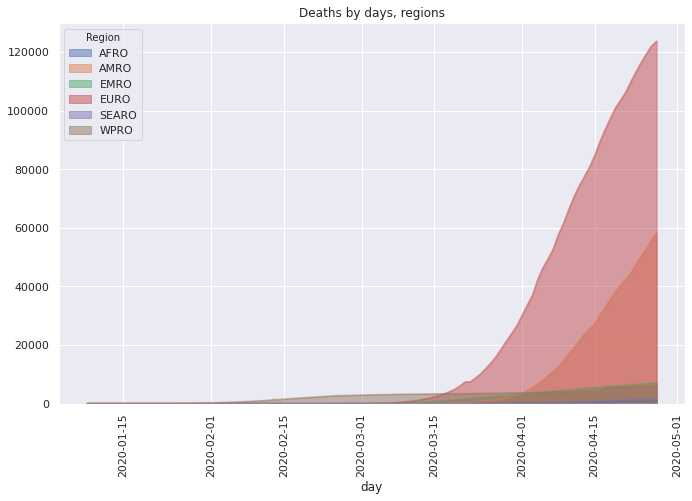

In [0]:
rdf = df[df.Confirmed > 0].groupby(['day', 'Region']).Deaths.sum()
rdf = rdf.unstack().fillna(0)

ax = rdf.cumsum().plot.area(stacked=False, figsize=(10, 7), title="Deaths by days, regions")
plt.xticks(rotation=90);

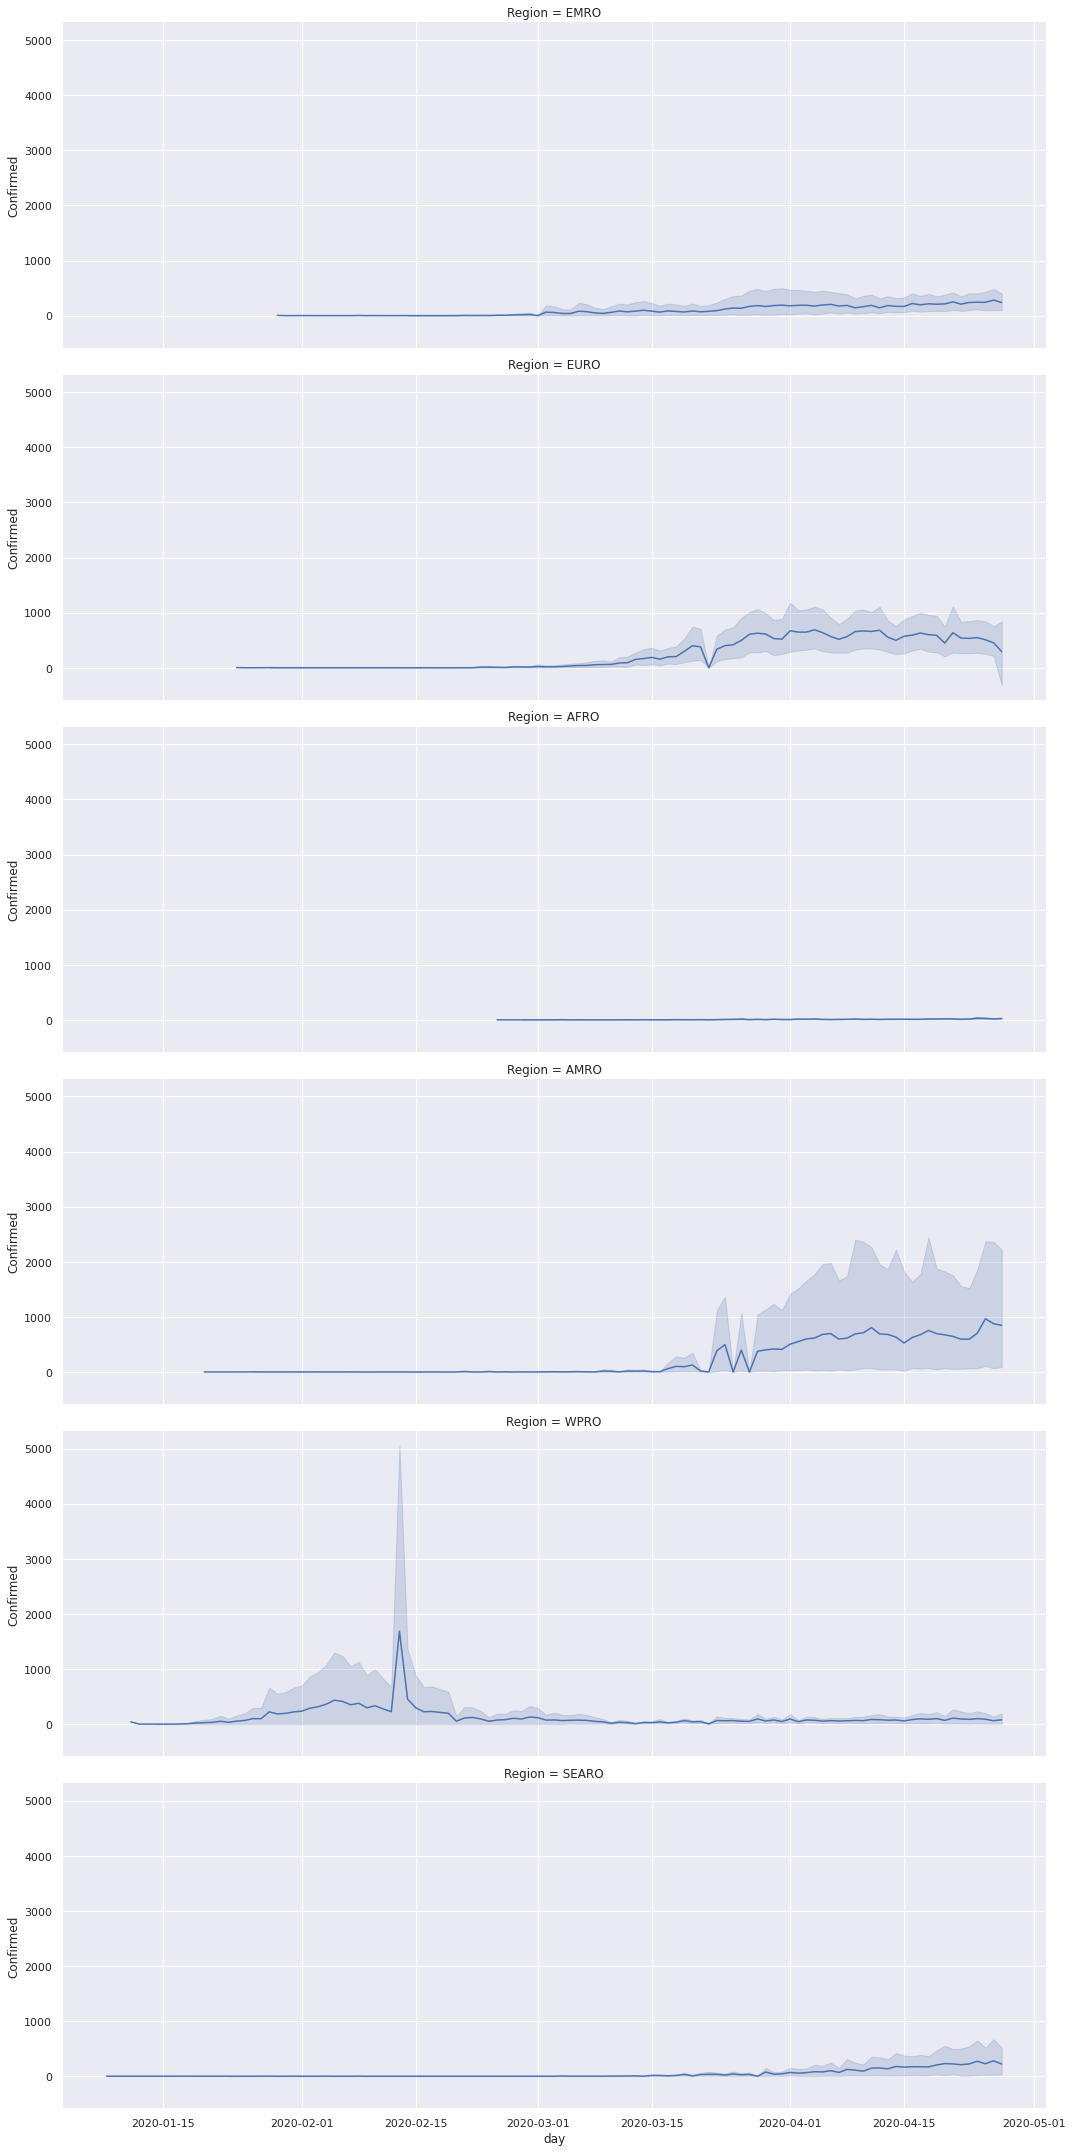

In [0]:
ax = sns.relplot(data=df, x='day', y='Confirmed', row='Region', kind='line', height=5, aspect=3)

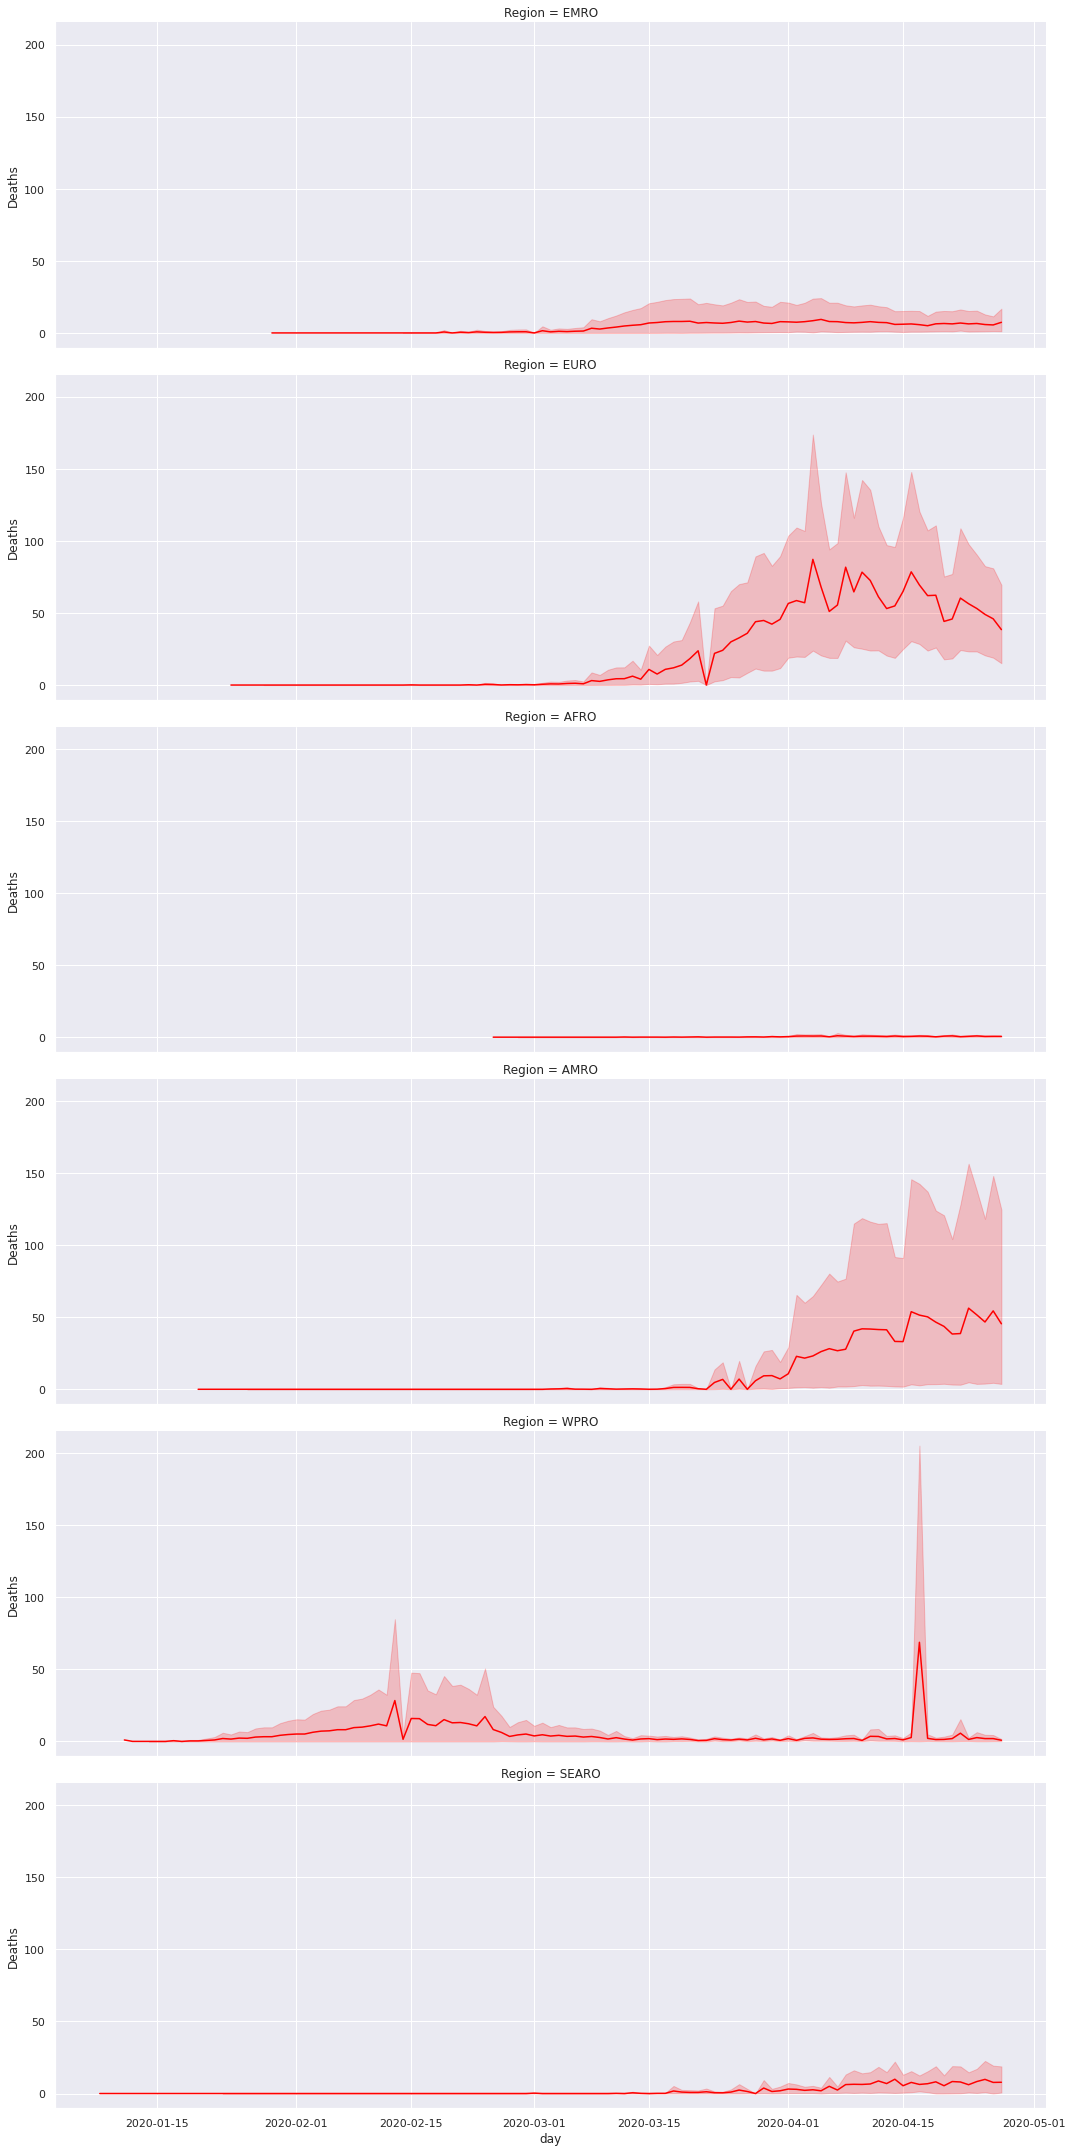

In [0]:
ax = sns.relplot(data=df, x='day', y='Deaths', row='Region', kind='line', height=5, aspect=3, color='red')

Analysis by country

In [0]:
country = 'UA'

country_data = df[df['Country'] == country].drop(columns=['Country', 'Country Name'])
country_data.tail()

,day,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed,month
10778,2020-04-23,EURO,13,187,578,7170,4
10779,2020-04-24,EURO,6,193,477,7647,4
10780,2020-04-25,EURO,8,201,478,8125,4
10781,2020-04-26,EURO,8,209,492,8617,4
10782,2020-04-27,EURO,11,220,392,9009,4


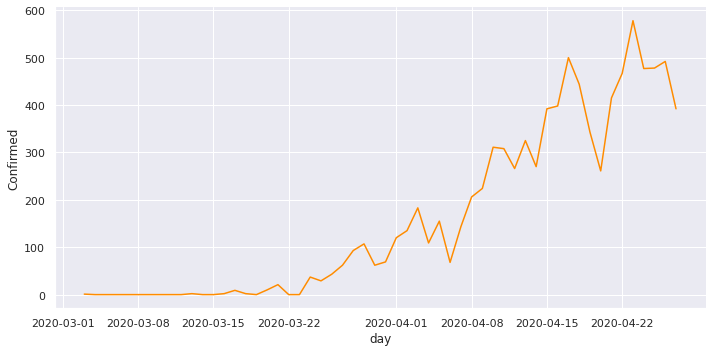

In [0]:
confirmed = country_data[['day', 'Confirmed']]

# ax = confirmed.plot(x='day', y='Confirmed', figsize=(10,7), color="darkorange")
# plt.xticks(rotation=90);
ax = sns.relplot(data=country_data, x='day', y='Confirmed', kind='line', height=5, aspect=2, color='darkorange')

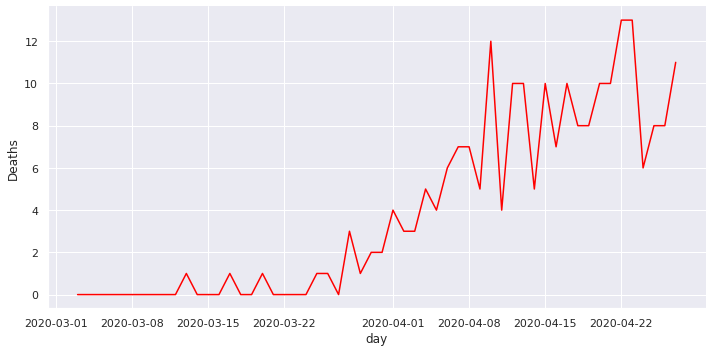

In [0]:
deaths = country_data[['day', 'Deaths']]

# ax = deaths.plot(x='day', y='Deaths', figsize=(10,7), color='red')
# plt.xticks(rotation=90);
ax = sns.relplot(data=country_data, x='day', y='Deaths', kind='line', height=5, aspect=2, color='red')

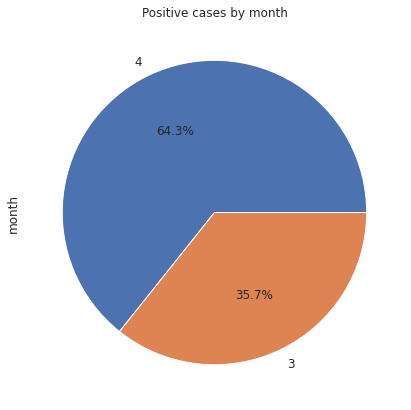

In [0]:
ax = (country_data[country_data.Confirmed > 0]['month'].value_counts()*100.0 /len(country_data[country_data.Confirmed > 0])).plot.pie(autopct='%.1f%%',figsize =(7,7), title='Positive cases by month', fontsize = 12)